In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 'pyr_four_nostr.csv' is the original classifier train set
# 'pyr_four_nostr_mmstats.csv' adds in 10 additional mito-to-mito distance statistics

pyr_four = pd.read_csv('pyr_four_nostr_mmstats.csv', index_col=[0])

In [5]:
# split test size
testsize = 0.30

# number of estimators
n_est = 100

# random state
random_st = 1

# decision tree classifier conditions
min_sampleaf = 1
min_sampsplit = 2 
min_weightfractionleaf = 0.0

In [6]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

In [8]:
predictions = dtree.predict(X_test)

In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.79      0.80      0.80      6004
      Axonal       0.73      0.74      0.73      3690
       Basal       0.84      0.84      0.84     16460
     Somatic       0.96      0.95      0.96     28118

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [10]:
print(confusion_matrix(y_test,predictions))

[[ 4817    83   892   212]
 [   65  2713   787   125]
 [  980   762 13855   863]
 [  240   163   874 26841]]


In [11]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_st)
rfc.fit(X_train, y_train)
elapsed_time = time.time() - start_time

In [12]:
print(f"Elapsed time to compute the Random Forest Classifer: {elapsed_time:.3f} seconds")

Elapsed time to compute the Random Forest Classifer: 57.419 seconds


In [13]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 4882    19   900   203]
 [   37  2918   614   121]
 [  480   371 14931   678]
 [   52    10   336 27720]]


In [14]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.90      0.81      0.85      6004
      Axonal       0.88      0.79      0.83      3690
       Basal       0.89      0.91      0.90     16460
     Somatic       0.97      0.99      0.98     28118

    accuracy                           0.93     54272
   macro avg       0.91      0.87      0.89     54272
weighted avg       0.93      0.93      0.93     54272



In [15]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [16]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [17]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 57.193 seconds


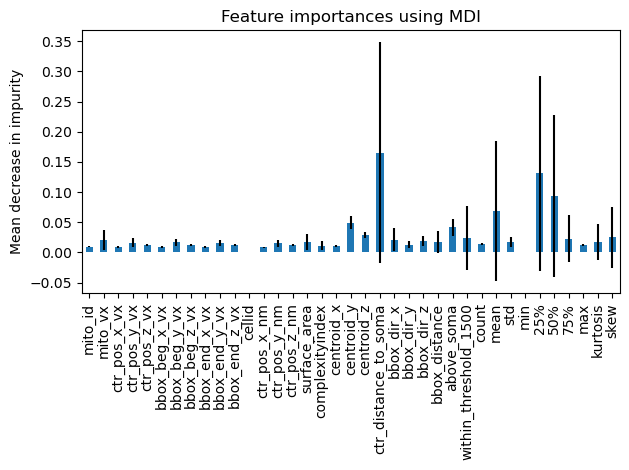

In [18]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
# re-run without updating rfc
# these 3 lines are required for the increased accuracy; if you uncomment them, the following analysis is not different from above
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

In [21]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.79      0.80      0.79      5962
      Axonal       0.72      0.74      0.73      3719
       Basal       0.84      0.84      0.84     16430
     Somatic       0.96      0.95      0.95     28161

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [22]:
print(confusion_matrix(y_test,predictions))

[[ 4748    78   902   234]
 [   79  2739   751   150]
 [  943   809 13803   875]
 [  239   166   889 26867]]


In [23]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 5630     3   267    62]
 [   11  3480   185    43]
 [  166   122 15938   204]
 [   19     4   101 28037]]


In [24]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.97      0.94      0.96      5962
      Axonal       0.96      0.94      0.95      3719
       Basal       0.97      0.97      0.97     16430
     Somatic       0.99      1.00      0.99     28161

    accuracy                           0.98     54272
   macro avg       0.97      0.96      0.97     54272
weighted avg       0.98      0.98      0.98     54272



In [25]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [26]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [27]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 57.160 seconds


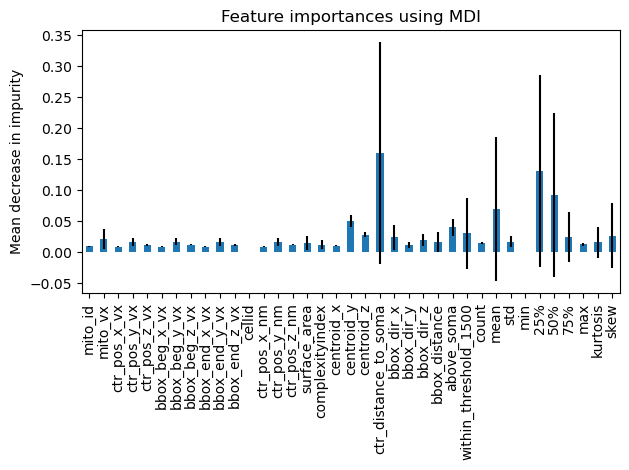

In [28]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()